In [14]:
!pip install fastf1

import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\rouvi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
# Load the race session for the 2019 German Grand Prix, Race ('R' session)
session = fastf1.get_session(2019, 'German Grand Prix', 'R')
session.load()

core           INFO 	Loading data for German Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '5', '26', '18', '55', '23', '8', '20', '44', '88', '63', '7', '99', '10', '77', '27', '16', '4', '3', '11']


In [16]:
######################################################
# Select the desired laps and driver
selected_lap_numbers = [29,55, 32]#range(4,6)#
driver_code = "VER"
######################################################
# Get laps for the driver
driver_laps = session.laps.pick_driver(driver_code)

# Check if there are any laps available for this driver
if driver_laps.empty:
    print(f"No laps available for driver {driver_code}")

# Extract telemetry for the fastest lap of this driver
selected_laps = driver_laps.pick_laps(selected_lap_numbers)
# Other possible functions selected_laps = driver_laps#.pick_fastest()
# OR selected_laps = driver_laps.pick_laps(range(10,21))
# OR selected_laps = driver_laps.pick_laps(1)

position_data_100 = []  # List to store position data for each lap at 100Hz
position_data_orig = [] # List to store position data for each lap at original frequency


# Iterate through selected laps and plot individually
for lap_number in selected_lap_numbers:
    lap_data = selected_laps[selected_laps['LapNumber'] == lap_number] # Filter data for current lap

    # Get telemetry data at both frequencies
    telemetry_100 = lap_data.get_telemetry(frequency=100)
    telemetry_original = lap_data.get_telemetry(frequency='original')

    # Combine them into a DataFrame
    position_data_100.append(pd.DataFrame({
        'X': telemetry_100['X']/10, # Adjust from 1/10m -> 1m scale
        'Y': telemetry_100['Y']/10, # Adjust from 1/10m -> 1m scale
        'Lap': lap_number,
        'Distance': telemetry_100['Distance'],
        'Time': telemetry_100['Date']  # Add timestamps to check the data frequency
    }))

    # Combine them into a DataFrame
    position_data_orig.append(pd.DataFrame({
        'X': telemetry_original['X']/10, # Adjust from 1/10m -> 1m scale
        'Y': telemetry_original['Y']/10, # Adjust from 1/10m -> 1m scale
        'Lap': lap_number,
        'Distance': telemetry_original['Distance'],
        'Time': telemetry_original['Date']  # Add timestamps to check the data frequency
    }))
display(position_data_100)

[           X      Y  Lap     Distance                    Time
 21    -100.6 -141.3   29     0.614701 2019-07-28 14:05:37.474
 22    -100.8 -141.1   29     0.995449 2019-07-28 14:05:37.480
 23    -100.9 -140.8   29     1.630170 2019-07-28 14:05:37.490
 24    -101.1 -140.5   29     2.265133 2019-07-28 14:05:37.500
 25    -101.2 -140.1   29     2.900307 2019-07-28 14:05:37.510
 ...      ...    ...  ...          ...                     ...
 12570 -327.6 -832.5   29  4539.745750 2019-07-28 14:07:42.960
 12571 -327.7 -832.5   29  4539.968017 2019-07-28 14:07:42.970
 12572 -327.7 -832.5   29  4540.190282 2019-07-28 14:07:42.980
 12573 -327.7 -832.5   29  4540.412532 2019-07-28 14:07:42.990
 12574 -327.7 -832.5   29  4540.501426 2019-07-28 14:07:42.994
 
 [12554 rows x 5 columns],
          X      Y  Lap     Distance                    Time
 25   -68.3 -209.1   55     0.010171 2019-07-28 14:49:27.265
 26   -68.7 -208.3   55     0.764886 2019-07-28 14:49:27.275
 27   -69.0 -207.5   55     1.51

In [17]:
for i, lap_number in enumerate(selected_lap_numbers):
    # ... (your existing code to process telemetry and create position_data DataFrames) ...

    print(f"Telemetry for driver {driver_code} at 100 frequency for lap {lap_number}:")
    print(f"Number of data points: {len(position_data_100[i])}")  # Accessing data from the list
    print(f"Average time interval between points: {position_data_100[i]['Time'].diff().dt.total_seconds().mean()} seconds")
    print(position_data_100[i].head())  # Displaying head for current lap

    print(f"Telemetry for driver {driver_code} at original frequency for lap {lap_number}:")
    print(f"Number of data points: {len(position_data_orig[i])}")  # Accessing data from the list
    print(f"Average time interval between points: {position_data_orig[i]['Time'].diff().dt.total_seconds().mean()} seconds")
    print(position_data_orig[i].head())  # Displaying head for current lap


Telemetry for driver VER at 100 frequency for lap 29:
Number of data points: 12554
Average time interval between points: 0.009999203377678643 seconds
        X      Y  Lap  Distance                    Time
21 -100.6 -141.3   29  0.614701 2019-07-28 14:05:37.474
22 -100.8 -141.1   29  0.995449 2019-07-28 14:05:37.480
23 -100.9 -140.8   29  1.630170 2019-07-28 14:05:37.490
24 -101.1 -140.5   29  2.265133 2019-07-28 14:05:37.500
25 -101.2 -140.1   29  2.900307 2019-07-28 14:05:37.510
Telemetry for driver VER at original frequency for lap 29:
Number of data points: 955
Average time interval between points: 0.13157232704402516 seconds
       X      Y  Lap   Distance                    Time
2 -100.6 -141.2   29   0.109548 2019-07-28 14:05:37.474
3 -101.8 -139.0   29   4.807222 2019-07-28 14:05:37.548
4 -102.1 -138.5   29   6.210900 2019-07-28 14:05:37.570
5 -103.4 -135.5   29  20.273889 2019-07-28 14:05:37.788
6 -103.8 -134.9   29  25.614347 2019-07-28 14:05:37.870
Telemetry for driver VER a

Import Boundary data

Index([0, 1], dtype='int64')


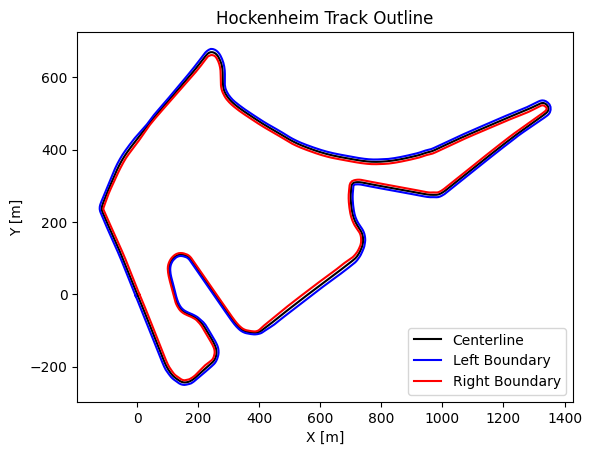

In [18]:
# Load the CSV data
track_data_url = "https://raw.githubusercontent.com/TUMFTM/racetrack-database/master/tracks/Hockenheim.csv"
df = pd.read_csv(track_data_url)

# Load the ideal racing line data
raceline_url = 'https://github.com/TUMFTM/racetrack-database/raw/e59595d1f3573b30d1ded6a08984935b957688e0/racelines/Hockenheim.csv'
raceline_data = pd.read_csv(raceline_url, comment='#', header=None)  # Load the raceline data

print(raceline_data.columns)

# Extract the centerline and track width data
x = df['# x_m'].values  # Adjust based on the actual column name
y = df['y_m'].values    # Adjust based on the actual column name
track_width_right = df['w_tr_right_m'].values
track_width_left = df['w_tr_left_m'].values

#print(track_width_right[1])

# Calculate the direction vectors (tangent vectors) between consecutive points
dx = np.diff(x)
dy = np.diff(y)

# Calculate the magnitude of the tangent vectors
tangent_norm = np.sqrt(dx**2 + dy**2)

# Normalize the tangent vectors to get unit vectors
tangent_x = dx / tangent_norm
tangent_y = dy / tangent_norm

# Calculate the normal vectors (perpendicular to tangent)
normal_x = -tangent_y
normal_y = tangent_x

# Calculate the left and right boundaries by offsetting along the normal vectors
x_left = x[:-1] + normal_x * track_width_left[:-1]
y_left = y[:-1] + normal_y * track_width_left[:-1]
x_right = x[:-1] - normal_x * track_width_right[:-1]
y_right = y[:-1] - normal_y * track_width_right[:-1]

# Ensure the right boundary is closed
x_right = np.append(x_right, x_right[0])
y_right = np.append(y_right, y_right[0])

# Ensure the left boundary is closed
x_left = np.append(x_left, x_left[0])
y_left = np.append(y_left, y_left[0])


# Plot the track
plt.plot(x, y, label='Centerline', color='black')
plt.plot(x_left, y_left, label='Left Boundary', color='blue')
plt.plot(x_right, y_right, label='Right Boundary', color='red')

plt.title("Hockenheim Track Outline")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
plt.show()

Plot the racetrack with racelines

In [19]:
import plotly.graph_objects as go

fig = go.Figure()

# Figure out the offset. Could be automated by optimizing it in a way that the most points (of all rounds) are within the boundaries
offset_x = 71
offset_y = 198

# Add telemetry data for each lap
for i, lap_number in enumerate(selected_lap_numbers):
    fig.add_trace(go.Scatter(
        x=position_data_100[i]['X'],
        y=position_data_100[i]['Y'],
        mode='lines',
        name=f'Data f=100 Lap {lap_number}'
    ))
    fig.add_trace(go.Scatter(
        x=position_data_orig[i]['X'],
        y=position_data_orig[i]['Y'],
        mode='markers',
        name=f'Original Data Lap {lap_number}'
    ))

# Add track boundaries and ideal racing line (same as before)
fig.add_trace(go.Scatter(x=x_left - offset_x, y=y_left - offset_y, mode='lines', name='Right Boundary'))
fig.add_trace(go.Scatter(x=x_right - offset_x, y=y_right - offset_y, mode='lines', name='Left Boundary'))
fig.add_trace(go.Scatter(x=raceline_data[0] - offset_x, y=raceline_data[1] - offset_y, mode='lines', name='Ideal racing line'))

# Customize layout (same as before)
fig.update_layout(
    title="Track Boundaries and Ideal Racing Line",
    xaxis_title="X (meters)",
    yaxis_title="Y (meters)",
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Filtering Invalid points

In [ ]:
from shapely.geometry import Point, Polygon

# ... (previous code) ...

# Shift the boundary coordinates by the relative offset to race track coords
x_left_shifted = x_left - offset_x
y_left_shifted = y_left - offset_y
x_right_shifted = x_right - offset_x
y_right_shifted = y_right - offset_y

# Create Polygon objects for boundaries (same as before)
inner_boundary = Polygon(zip(x_left_shifted, y_left_shifted))
outer_boundary = Polygon(zip(x_right_shifted, y_right_shifted))

# Filter points for each lap
for i in range(len(position_data_100)):
    # Create a mask for valid points (Check if points are within outer but not inner boundary)
    mask_100 = position_data_100[i].apply(lambda row: inner_boundary.contains(Point(row['X'], row['Y'])) and not outer_boundary.contains(Point(row['X'], row['Y'])), axis=1)
    mask_orig = position_data_orig[i].apply(lambda row: inner_boundary.contains(Point(row['X'], row['Y'])) and not outer_boundary.contains(Point(row['X'], row['Y'])), axis=1)

    # Update the DataFrames with filtered data
    position_data_100[i] = position_data_100[i][mask_100]
    position_data_orig[i] = position_data_orig[i][mask_orig]


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Figure out the offset. Could be automated by optimizing it in a way that the most points (of all rounds) are within the boundaries
offset_x = 71
offset_y = 198

# Add telemetry data for each lap
for i, lap_number in enumerate(selected_lap_numbers):
    fig.add_trace(go.Scatter(
        x=position_data_100[i]['X'],
        y=position_data_100[i]['Y'],
        mode='lines',
        name=f'Data f=100 Lap {lap_number}'
    ))
    fig.add_trace(go.Scatter(
        x=position_data_orig[i]['X'],
        y=position_data_orig[i]['Y'],
        mode='markers',
        name=f'Original Data Lap {lap_number}'
    ))

# Add track boundaries and ideal racing line (same as before)
fig.add_trace(go.Scatter(x=x_left - offset_x, y=y_left - offset_y, mode='lines', name='Right Boundary'))
fig.add_trace(go.Scatter(x=x_right - offset_x, y=y_right - offset_y, mode='lines', name='Left Boundary'))
fig.add_trace(go.Scatter(x=raceline_data[0] - offset_x, y=raceline_data[1] - offset_y, mode='lines', name='Ideal racing line'))

# Customize layout (same as before)
fig.update_layout(
    title="Track Boundaries and Ideal Racing Line",
    xaxis_title="X (meters)",
    yaxis_title="Y (meters)",
)

fig.show()

# Calculate Difference between Vectors (Diff plot)

In [ ]:
#
import plotly.graph_objects as go
import numpy as np

# ... (previous code) ...

fig = go.Figure()

for i, lap_number in enumerate(selected_lap_numbers):
    # Get valid x and y coordinates for the current lap
    valid_x = position_data_100[i]['X'].values
    valid_y = position_data_100[i]['Y'].values

    # Calculate direction vectors (tangent vectors)
    dx_race = np.diff(valid_x)
    dy_race = np.diff(valid_y)

    # Calculate magnitude of tangent vectors
    tangent_norm_race = np.sqrt(dx_race**2 + dy_race**2)

    # Normalize tangent vectors to get unit vectors
    tangent_x_race = dx_race / tangent_norm_race
    tangent_y_race = dy_race / tangent_norm_race

    # Calculate normal vectors (perpendicular to tangent)
    normal_x_race = -tangent_y_race
    normal_y_race = tangent_x_race

    # Calculate angle changes
    dx_race = np.diff(normal_x_race)
    dy_race = np.diff(normal_y_race)
    change = np.sqrt(dx_race**2 + dy_race**2)

    # Get distance values for the current lap
    distances = position_data_100[i]['Distance'].values

    # Add trace for the current lap using distance as x-axis
    fig.add_trace(go.Scatter(
        x=distances[1:],  # Use distances[1:] to align with change values
        y=change,
        mode='lines',
        name=f'Magnitude of Tangent Vectors - Lap {lap_number}'
    ))

# Customize layout
fig.update_layout(
    title="Magnitude of Tangent Vectors",
    xaxis_title="Distance (m)",  # Change x-axis title
    yaxis_title="Magnitude"
    #yaxis_range=[0, 0.1]
)

fig.show()

<ipython-input-161-b39f6b1ca1d0>:22: RuntimeWarning:

invalid value encountered in divide

<ipython-input-161-b39f6b1ca1d0>:23: RuntimeWarning:

invalid value encountered in divide



# Distance to outer line


In [ ]:
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points


all_distances_to_inner = []  # List to store distances for all laps
all_distances_to_outer = [] # List to store distances for all laps

for i, lap_number in enumerate(selected_lap_numbers):
    distances_to_inner = []  # Distances for current lap
    distances_to_outer = [] # Distances for current lap

    # Get valid x and y coordinates for the current lap
    valid_x = position_data_100[i]['X'].values
    valid_y = position_data_100[i]['Y'].values

    for x, y in zip(valid_x, valid_y):
        point = Point(x, y)
        # Distance to inner boundary
        nearest_inner = nearest_points(point, inner_boundary)[1]
        distances_to_inner.append(point.distance(nearest_inner))
        # Distance to outer boundary
        nearest_outer = nearest_points(point, outer_boundary)[1]
        distances_to_outer.append(point.distance(nearest_outer))

    # Append distances for this lap to the overall lists
    all_distances_to_inner.append(distances_to_inner)
    all_distances_to_outer.append(distances_to_outer)


In [ ]:
fig = go.Figure()

for i, lap_number in enumerate(selected_lap_numbers):
    # Get distance values for the current lap
    distances = position_data_100[i]['Distance'].values

    # Add traces for inner and outer distances
    fig.add_trace(go.Scatter(
        x=distances,
        y=all_distances_to_inner[i],
        mode='lines',
        name=f'Distance to Inner Boundary - Lap {lap_number}'
    ))
    fig.add_trace(go.Scatter(
        x=distances,
        y=all_distances_to_outer[i],
        mode='lines',
        name=f'Distance to Outer Boundary - Lap {lap_number}'
    ))

# Customize layout
fig.update_layout(
    title="Distances to Boundaries",
    xaxis_title="Distance (m)",
    yaxis_title="Distance to Boundary (m)"
)

fig.show()

# Relative racing line

In [ ]:
import plotly.graph_objects as go
import numpy as np
from shapely.geometry import Point, LineString

fig = go.Figure()

# Create LineString objects for left and right boundaries
left_boundary = LineString(zip(x_left_shifted, y_left_shifted))
right_boundary = LineString(zip(x_right_shifted, y_right_shifted))

relative_positions_all_laps = []

for i, lap_number in enumerate(selected_lap_numbers):

    relative_positions = []
    for x, y in zip(position_data_100[i]['X'].values, position_data_100[i]['Y'].values):
        point = Point(x, y)

        # Calculate distances to boundaries
        distance_to_inner = point.distance(left_boundary)
        distance_to_outer = point.distance(right_boundary)

        # Calculate relative position
        total_width = distance_to_inner + distance_to_outer
        relative_position = distance_to_inner / total_width

        relative_positions.append(relative_position)

    relative_positions_all_laps.append(relative_positions)

In [ ]:
fig = go.Figure()

for i, lap_number in enumerate(selected_lap_numbers):
    # Access distances for the current lap
    distances = position_data_100[i]['Distance'].values

    # Access relative_positions for the current lap
    # (Assuming you have a list of relative_positions for each lap)
    # Example: relative_positions_all_laps = [relative_positions_lap1, relative_positions_lap2, ...]
    relative_positions = relative_positions_all_laps[i]

    fig.add_trace(go.Scatter(
        x=distances,
        y=relative_positions,
        mode='lines',
        name=f'Lap {lap_number}'
    ))
max_distance = max(distances)  # Get the maximum distance value


# Add horizontal lines for boundaries (modified)
fig.add_shape(go.layout.Shape(
    type="line",
    x0=0,
    x1=max_distance,  # Adjust x1 to cover the desired x-axis range
    y0=0,
    y1=0,
    line=dict(color="Black", width=3, dash="solid"),  # Changed color, width, and dash
))
fig.add_shape(go.layout.Shape(
    type="line",
    x0=0,
    x1=max_distance,  # Adjust x1 to cover the desired x-axis range
    y0=1,
    y1=1,
    line=dict(color="Black", width=3, dash="solid"),  # Changed color, width, and dash
))


# Add annotations for boundary labels (modified)
fig.add_annotation(
    x=max_distance * 0.15, # Adjust the position to be inside the plot
    y=0.05,  # Position slightly below the line (adjust as needed)
    text="Right Boundary",
    showarrow=False,
    font=dict(size=12),
    xanchor="right",  # Anchor to the right to avoid overlapping with the line
    yanchor="top"   # Anchor to the top to position it below the line
)
fig.add_annotation(
    x=max_distance * 0.13, # Adjust the position to be inside the plot
    y=0.95,  # Position slightly above the line (adjust as needed)
    text="Left Boundary",
    showarrow=False,
    font=dict(size=12),
    xanchor="right",  # Anchor to the right to avoid overlapping with the line
    yanchor="bottom"  # Anchor to the bottom to position it above the line
)

fig.update_layout(
    title="Relative Position Between Boundaries",
    xaxis_title="Distance (meters)",
    yaxis_title="Relative Position (0 = Outer Boundary, 1 = Inner Boundary)"
)

fig.show()